In [5]:
import pandas as pd
import numpy as np
import os
import koreanize_matplotlib
import seaborn as sns
%config InlineBackend.figure_format = 'retina'  #선명하게 만들기
#한글폰트 가져오기
from matplotlib import rc
rc('font', family='NanumGothic')
import matplotlib.pyplot as plt

# 결측치 확인하는 라이브러리
import missingno as msno
import chardet

from sklearn.cluster import KMeans

path = 'C:/Users/sim/Desktop/medical/data'
os.chdir(path)
print(os.getcwd())

C:\Users\sim\Desktop\medical\data


In [6]:
df = pd.read_csv('uc_similarity_female_TF.csv')
df_origin = df.copy()

In [7]:
df

,수축기혈압,이완기혈압,식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,시력,청력,BMI_WC_risk,WHtR_risk
0,-1.147266,-1.102393,0.224958,-1.567079,-0.000000,-3.800461,-0.260650,-0.192566,-0.619813,-0.000000,2.731847,1.429693,-0.0,-0.000000,-1.345029
1,0.353005,-0.330718,-0.000000,-0.050551,-0.000000,-3.800461,-0.521301,-0.281442,-0.619813,-0.000000,2.731847,1.715631,-0.0,0.786243,-0.000000
2,4.147807,2.315025,1.799664,-0.050551,-0.000000,-3.215775,0.065163,0.222191,-0.163109,-0.000000,2.731847,1.143754,-0.0,2.358728,-0.000000
3,0.794261,-0.330718,-0.974818,-4.903441,-0.000000,-3.800461,-0.130325,-0.162940,-0.946031,-0.000000,2.731847,0.571877,-0.0,0.786243,-1.345029
4,1.676773,0.881914,-0.074986,1.162672,-0.000000,-3.215775,0.195488,0.162940,-0.358839,-0.000000,-0.000000,1.000785,-0.0,0.786243,-1.345029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53719,1.323768,-0.000000,0.899832,0.252755,-0.000000,-3.215775,-0.065163,-0.222191,-0.358839,-0.000000,2.731847,2.573447,-0.0,-0.000000,-1.345029
53720,2.029778,0.771675,0.224958,0.556060,-0.000000,-1.461716,-0.130325,-0.251817,-0.293596,-0.000000,2.731847,-0.142969,-0.0,0.786243,-0.000000
53721,1.853275,0.992153,-0.374930,-2.578098,-0.000000,-3.215775,-0.260650,0.014813,0.032622,3.517855,2.731847,1.429693,-0.0,2.358728,-0.000000
53722,-0.441256,-0.992153,0.224958,-0.151653,-0.000000,-2.631088,-0.000000,-0.103689,-0.619813,-0.000000,2.731847,1.429693,-0.0,0.786243,-1.345029


In [8]:
df = df.applymap(lambda x: 0 if np.isclose(x, 0) else x)
df

C:\Users\sim\AppData\Local\Temp\ipykernel_1816\981863745.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 0 if np.isclose(x, 0) else x)


,수축기혈압,이완기혈압,식전혈당(공복혈당),혈색소,요단백,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,흡연상태,음주여부,시력,청력,BMI_WC_risk,WHtR_risk
0,-1.147266,-1.102393,0.224958,-1.567079,0.000000,-3.800461,-0.260650,-0.192566,-0.619813,0.000000,2.731847,1.429693,0.0,0.000000,-1.345029
1,0.353005,-0.330718,0.000000,-0.050551,0.000000,-3.800461,-0.521301,-0.281442,-0.619813,0.000000,2.731847,1.715631,0.0,0.786243,0.000000
2,4.147807,2.315025,1.799664,-0.050551,0.000000,-3.215775,0.065163,0.222191,-0.163109,0.000000,2.731847,1.143754,0.0,2.358728,0.000000
3,0.794261,-0.330718,-0.974818,-4.903441,0.000000,-3.800461,-0.130325,-0.162940,-0.946031,0.000000,2.731847,0.571877,0.0,0.786243,-1.345029
4,1.676773,0.881914,-0.074986,1.162672,0.000000,-3.215775,0.195488,0.162940,-0.358839,0.000000,0.000000,1.000785,0.0,0.786243,-1.345029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53719,1.323768,0.000000,0.899832,0.252755,0.000000,-3.215775,-0.065163,-0.222191,-0.358839,0.000000,2.731847,2.573447,0.0,0.000000,-1.345029
53720,2.029778,0.771675,0.224958,0.556060,0.000000,-1.461716,-0.130325,-0.251817,-0.293596,0.000000,2.731847,-0.142969,0.0,0.786243,0.000000
53721,1.853275,0.992153,-0.374930,-2.578098,0.000000,-3.215775,-0.260650,0.014813,0.032622,3.517855,2.731847,1.429693,0.0,2.358728,0.000000
53722,-0.441256,-0.992153,0.224958,-0.151653,0.000000,-2.631088,0.000000,-0.103689,-0.619813,0.000000,2.731847,1.429693,0.0,0.786243,-1.345029


In [9]:
subset_dict = {
    "Blood_Pressure_group": df[['수축기혈압', '이완기혈압']],
    "Anemia_group": df[['혈색소']],
    "Liver_Kidney_group": df[['혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피']],
    "Obesity_group": df[['BMI_WC_risk', 'WHtR_risk']],
    "Smoking_Alcohol_group": df[['흡연상태', '음주여부']],
    "Vision_group": df[['시력']],
    "Hearing_group": df[['청력']],
    "Diabetes_group": df[['요단백', '식전혈당(공복혈당)', 'BMI_WC_risk', 'WHtR_risk']],
    "Cardiovascular_group": df[['수축기혈압', '이완기혈압', '식전혈당(공복혈당)', 'BMI_WC_risk', 'WHtR_risk', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피']]
}

subset_dict

{'Blood_Pressure_group':           수축기혈압     이완기혈압
 0     -1.147266 -1.102393
 1      0.353005 -0.330718
 2      4.147807  2.315025
 3      0.794261 -0.330718
 4      1.676773  0.881914
 ...         ...       ...
 53719  1.323768  0.000000
 53720  2.029778  0.771675
 53721  1.853275  0.992153
 53722 -0.441256 -0.992153
 53723 -0.617758 -0.330718
 
 [53724 rows x 2 columns],
 'Anemia_group':             혈색소
 0     -1.567079
 1     -0.050551
 2     -0.050551
 3     -4.903441
 4      1.162672
 ...         ...
 53719  0.252755
 53720  0.556060
 53721 -2.578098
 53722 -0.151653
 53723 -0.556060
 
 [53724 rows x 1 columns],
 'Liver_Kidney_group':         혈청크레아티닌  혈청지오티(AST)  혈청지피티(ALT)     감마지티피
 0     -3.800461   -0.260650   -0.192566 -0.619813
 1     -3.800461   -0.521301   -0.281442 -0.619813
 2     -3.215775    0.065163    0.222191 -0.163109
 3     -3.800461   -0.130325   -0.162940 -0.946031
 4     -3.215775    0.195488    0.162940 -0.358839
 ...         ...         ...         ...      

In [10]:
Blood_Pressure_group = subset_dict['Blood_Pressure_group']
Anemia_group = subset_dict['Anemia_group']
Liver_Kidney_group = subset_dict['Liver_Kidney_group']
Obesity_group = subset_dict['Obesity_group']
Smoking_Alcohol_group = subset_dict['Smoking_Alcohol_group']
Vision_group = subset_dict['Vision_group']
Hearing_group = subset_dict['Hearing_group']
Diabetes_group = subset_dict['Diabetes_group']
Cardiovascular_group = subset_dict['Cardiovascular_group']

In [11]:
display(Blood_Pressure_group.head())
display(Anemia_group.head())
display(Liver_Kidney_group.head())
display(Obesity_group.head())
display(Smoking_Alcohol_group.head())
display(Vision_group.head())
display(Hearing_group.head())
display(Diabetes_group.head())
display(Cardiovascular_group.head())

,수축기혈압,이완기혈압
0,-1.147266,-1.102393
1,0.353005,-0.330718
2,4.147807,2.315025
3,0.794261,-0.330718
4,1.676773,0.881914


,혈색소
0,-1.567079
1,-0.050551
2,-0.050551
3,-4.903441
4,1.162672


,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피
0,-3.800461,-0.260650,-0.192566,-0.619813
1,-3.800461,-0.521301,-0.281442,-0.619813
2,-3.215775,0.065163,0.222191,-0.163109
3,-3.800461,-0.130325,-0.162940,-0.946031
4,-3.215775,0.195488,0.162940,-0.358839


,BMI_WC_risk,WHtR_risk
0,0.000000,-1.345029
1,0.786243,0.000000
2,2.358728,0.000000
3,0.786243,-1.345029
4,0.786243,-1.345029


,흡연상태,음주여부
0,0.0,2.731847
1,0.0,2.731847
2,0.0,2.731847
3,0.0,2.731847
4,0.0,0.000000


,시력
0,1.429693
1,1.715631
2,1.143754
3,0.571877
4,1.000785


,청력
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


,요단백,식전혈당(공복혈당),BMI_WC_risk,WHtR_risk
0,0.0,0.224958,0.000000,-1.345029
1,0.0,0.000000,0.786243,0.000000
2,0.0,1.799664,2.358728,0.000000
3,0.0,-0.974818,0.786243,-1.345029
4,0.0,-0.074986,0.786243,-1.345029


,수축기혈압,이완기혈압,식전혈당(공복혈당),BMI_WC_risk,WHtR_risk,혈청지오티(AST),혈청지피티(ALT),감마지티피
0,-1.147266,-1.102393,0.224958,0.000000,-1.345029,-0.260650,-0.192566,-0.619813
1,0.353005,-0.330718,0.000000,0.786243,0.000000,-0.521301,-0.281442,-0.619813
2,4.147807,2.315025,1.799664,2.358728,0.000000,0.065163,0.222191,-0.163109
3,0.794261,-0.330718,-0.974818,0.786243,-1.345029,-0.130325,-0.162940,-0.946031
4,1.676773,0.881914,-0.074986,0.786243,-1.345029,0.195488,0.162940,-0.358839


### Blood_Pressure 그룹핑

In [12]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Blood_Pressure_group[['수축기혈압', '이완기혈압']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Blood_Pressure_group['수축기혈압_group'] = Blood_Pressure_group['수축기혈압'].apply(assign_group)
Blood_Pressure_group['이완기혈압_group'] = Blood_Pressure_group['이완기혈압'].apply(assign_group)

Blood_Pressure_group[['수축기혈압', '수축기혈압_group', '이완기혈압', '이완기혈압_group']]

C:\Users\sim\AppData\Local\Temp\ipykernel_1816\3534505479.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Blood_Pressure_group['수축기혈압_group'] = Blood_Pressure_group['수축기혈압'].apply(assign_group)
C:\Users\sim\AppData\Local\Temp\ipykernel_1816\3534505479.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Blood_Pressure_group['이완기혈압_group'] = Blood_Pressure_group['이완기혈압'].apply(assign_group)


,수축기혈압,수축기혈압_group,이완기혈압,이완기혈압_group
0,-1.147266,Low,-1.102393,Low
1,0.353005,High,-0.330718,Moderate
2,4.147807,Very High,2.315025,Very High
3,0.794261,High,-0.330718,Moderate
4,1.676773,Very High,0.881914,High
...,...,...,...,...
53719,1.323768,Very High,0.000000,Moderate
53720,2.029778,Very High,0.771675,High
53721,1.853275,Very High,0.992153,Very High
53722,-0.441256,Low,-0.992153,Low


In [13]:
def classify_blood_pressure(row):
    if (row['수축기혈압_group'] == 'Low' and row['이완기혈압_group'] in ['High', 'Very High']) or \
       (row['수축기혈압_group'] == 'Moderate' and row['이완기혈압_group'] in ['High', 'Very High']) or \
       (row['수축기혈압_group'] == 'High') or \
       (row['수축기혈압_group'] == 'Very High'):
        return 'Hypertension'
    else:
        return 'Normal'

Blood_Pressure_group['분류'] = Blood_Pressure_group.apply(classify_blood_pressure, axis=1)
Blood_Pressure_group

C:\Users\sim\AppData\Local\Temp\ipykernel_1816\257562653.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Blood_Pressure_group['분류'] = Blood_Pressure_group.apply(classify_blood_pressure, axis=1)


,수축기혈압,이완기혈압,수축기혈압_group,이완기혈압_group,분류
0,-1.147266,-1.102393,Low,Low,Normal
1,0.353005,-0.330718,High,Moderate,Hypertension
2,4.147807,2.315025,Very High,Very High,Hypertension
3,0.794261,-0.330718,High,Moderate,Hypertension
4,1.676773,0.881914,Very High,High,Hypertension
...,...,...,...,...,...
53719,1.323768,0.000000,Very High,Moderate,Hypertension
53720,2.029778,0.771675,Very High,High,Hypertension
53721,1.853275,0.992153,Very High,Very High,Hypertension
53722,-0.441256,-0.992153,Low,Low,Normal


### Anemia 그룹핑

In [14]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Anemia_group[['혈색소']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Anemia_group['혈색소_group'] = Anemia_group['혈색소'].apply(assign_group)

Anemia_group[['혈색소', '혈색소_group']]

C:\Users\sim\AppData\Local\Temp\ipykernel_1816\4013957606.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Anemia_group['혈색소_group'] = Anemia_group['혈색소'].apply(assign_group)


,혈색소,혈색소_group
0,-1.567079,Low
1,-0.050551,High
2,-0.050551,High
3,-4.903441,Low
4,1.162672,Very High
...,...,...
53719,0.252755,Very High
53720,0.556060,Very High
53721,-2.578098,Low
53722,-0.151653,High


In [15]:
def classify_anemia(row):
    if row['혈색소_group'] in ['Low', 'Moderate']:
        return 'Suspected Anemia'
    else:
        return 'Normal'

# 새로운 변수 '분류'에 조건에 따른 값을 채움
Anemia_group['분류'] = Anemia_group.apply(classify_anemia, axis=1)
Anemia_group

C:\Users\sim\AppData\Local\Temp\ipykernel_1816\870751960.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Anemia_group['분류'] = Anemia_group.apply(classify_anemia, axis=1)


,혈색소,혈색소_group,분류
0,-1.567079,Low,Suspected Anemia
1,-0.050551,High,Normal
2,-0.050551,High,Normal
3,-4.903441,Low,Suspected Anemia
4,1.162672,Very High,Normal
...,...,...,...
53719,0.252755,Very High,Normal
53720,0.556060,Very High,Normal
53721,-2.578098,Low,Suspected Anemia
53722,-0.151653,High,Normal


### Liver_Kidney 그룹핑

In [16]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Liver_Kidney_group[['혈청크레아티닌']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Liver_Kidney_group['혈청크레아티닌_group'] = Liver_Kidney_group['혈청크레아티닌'].apply(assign_group)

Liver_Kidney_group[['혈청크레아티닌', '혈청크레아티닌_group']]

C:\Users\sim\AppData\Local\Temp\ipykernel_1816\1164251364.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Liver_Kidney_group['혈청크레아티닌_group'] = Liver_Kidney_group['혈청크레아티닌'].apply(assign_group)


,혈청크레아티닌,혈청크레아티닌_group
0,-3.800461,Low
1,-3.800461,Low
2,-3.215775,Moderate
3,-3.800461,Low
4,-3.215775,Moderate
...,...,...
53719,-3.215775,Moderate
53720,-1.461716,Very High
53721,-3.215775,Moderate
53722,-2.631088,High


In [17]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Liver_Kidney_group[['혈청지오티(AST)']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Liver_Kidney_group['혈청지오티(AST)_group'] = Liver_Kidney_group['혈청지오티(AST)'].apply(assign_group)

Liver_Kidney_group[['혈청지오티(AST)', '혈청지오티(AST)_group']]

C:\Users\sim\AppData\Local\Temp\ipykernel_1816\4094487462.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Liver_Kidney_group['혈청지오티(AST)_group'] = Liver_Kidney_group['혈청지오티(AST)'].apply(assign_group)


,혈청지오티(AST),혈청지오티(AST)_group
0,-0.260650,Moderate
1,-0.521301,Low
2,0.065163,High
3,-0.130325,Moderate
4,0.195488,Very High
...,...,...
53719,-0.065163,High
53720,-0.130325,Moderate
53721,-0.260650,Moderate
53722,0.000000,High


In [18]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Liver_Kidney_group[['혈청지피티(ALT)']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Liver_Kidney_group['혈청지피티(ALT)_group'] = Liver_Kidney_group['혈청지피티(ALT)'].apply(assign_group)

Liver_Kidney_group[['혈청지피티(ALT)', '혈청지피티(ALT)_group']]

C:\Users\sim\AppData\Local\Temp\ipykernel_1816\318487928.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Liver_Kidney_group['혈청지피티(ALT)_group'] = Liver_Kidney_group['혈청지피티(ALT)'].apply(assign_group)


,혈청지피티(ALT),혈청지피티(ALT)_group
0,-0.192566,Moderate
1,-0.281442,Low
2,0.222191,Very High
3,-0.162940,Moderate
4,0.162940,Very High
...,...,...
53719,-0.222191,Low
53720,-0.251817,Low
53721,0.014813,Very High
53722,-0.103689,High


In [19]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Liver_Kidney_group[['감마지티피']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Liver_Kidney_group['감마지티피_group'] = Liver_Kidney_group['감마지티피'].apply(assign_group)

Liver_Kidney_group[['감마지티피', '감마지티피_group']]

C:\Users\sim\AppData\Local\Temp\ipykernel_1816\1626327061.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Liver_Kidney_group['감마지티피_group'] = Liver_Kidney_group['감마지티피'].apply(assign_group)


,감마지티피,감마지티피_group
0,-0.619813,Moderate
1,-0.619813,Moderate
2,-0.163109,Very High
3,-0.946031,Low
4,-0.358839,High
...,...,...
53719,-0.358839,High
53720,-0.293596,High
53721,0.032622,Very High
53722,-0.619813,Moderate


In [20]:
def classify(row):
    # 위험 기준 설정: 하나라도 'High' 또는 'Very High'일 경우 '위험'
    if (row['혈청크레아티닌_group'] in ['High', 'Very High'] or 
        row['혈청지오티(AST)_group'] in ['High', 'Very High'] or 
        row['혈청지피티(ALT)_group'] in ['High', 'Very High'] or 
        row['감마지티피_group'] in ['High', 'Very High']):
        return 'Suspected liver/kidney disease'
    else:
        return 'Normal'

# '분류' 열 생성
Liver_Kidney_group['분류'] = Liver_Kidney_group.apply(classify, axis=1)

# 결과 확인
Liver_Kidney_group[['혈청크레아티닌_group', '혈청지오티(AST)_group', 
                    '혈청지피티(ALT)_group', '감마지티피_group', '분류']].head()

C:\Users\sim\AppData\Local\Temp\ipykernel_1816\1222373076.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Liver_Kidney_group['분류'] = Liver_Kidney_group.apply(classify, axis=1)


,혈청크레아티닌_group,혈청지오티(AST)_group,혈청지피티(ALT)_group,감마지티피_group,분류
0,Low,Moderate,Moderate,Moderate,Normal
1,Low,Low,Low,Moderate,Normal
2,Moderate,High,Very High,Very High,Suspected liver/kidney disease
3,Low,Moderate,Moderate,Low,Normal
4,Moderate,Very High,Very High,High,Suspected liver/kidney disease


In [21]:
Liver_Kidney_group['분류'].value_counts()

분류
Suspected liver/kidney disease    41696
Normal                            12028
Name: count, dtype: int64

### Obesity 그룹핑

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


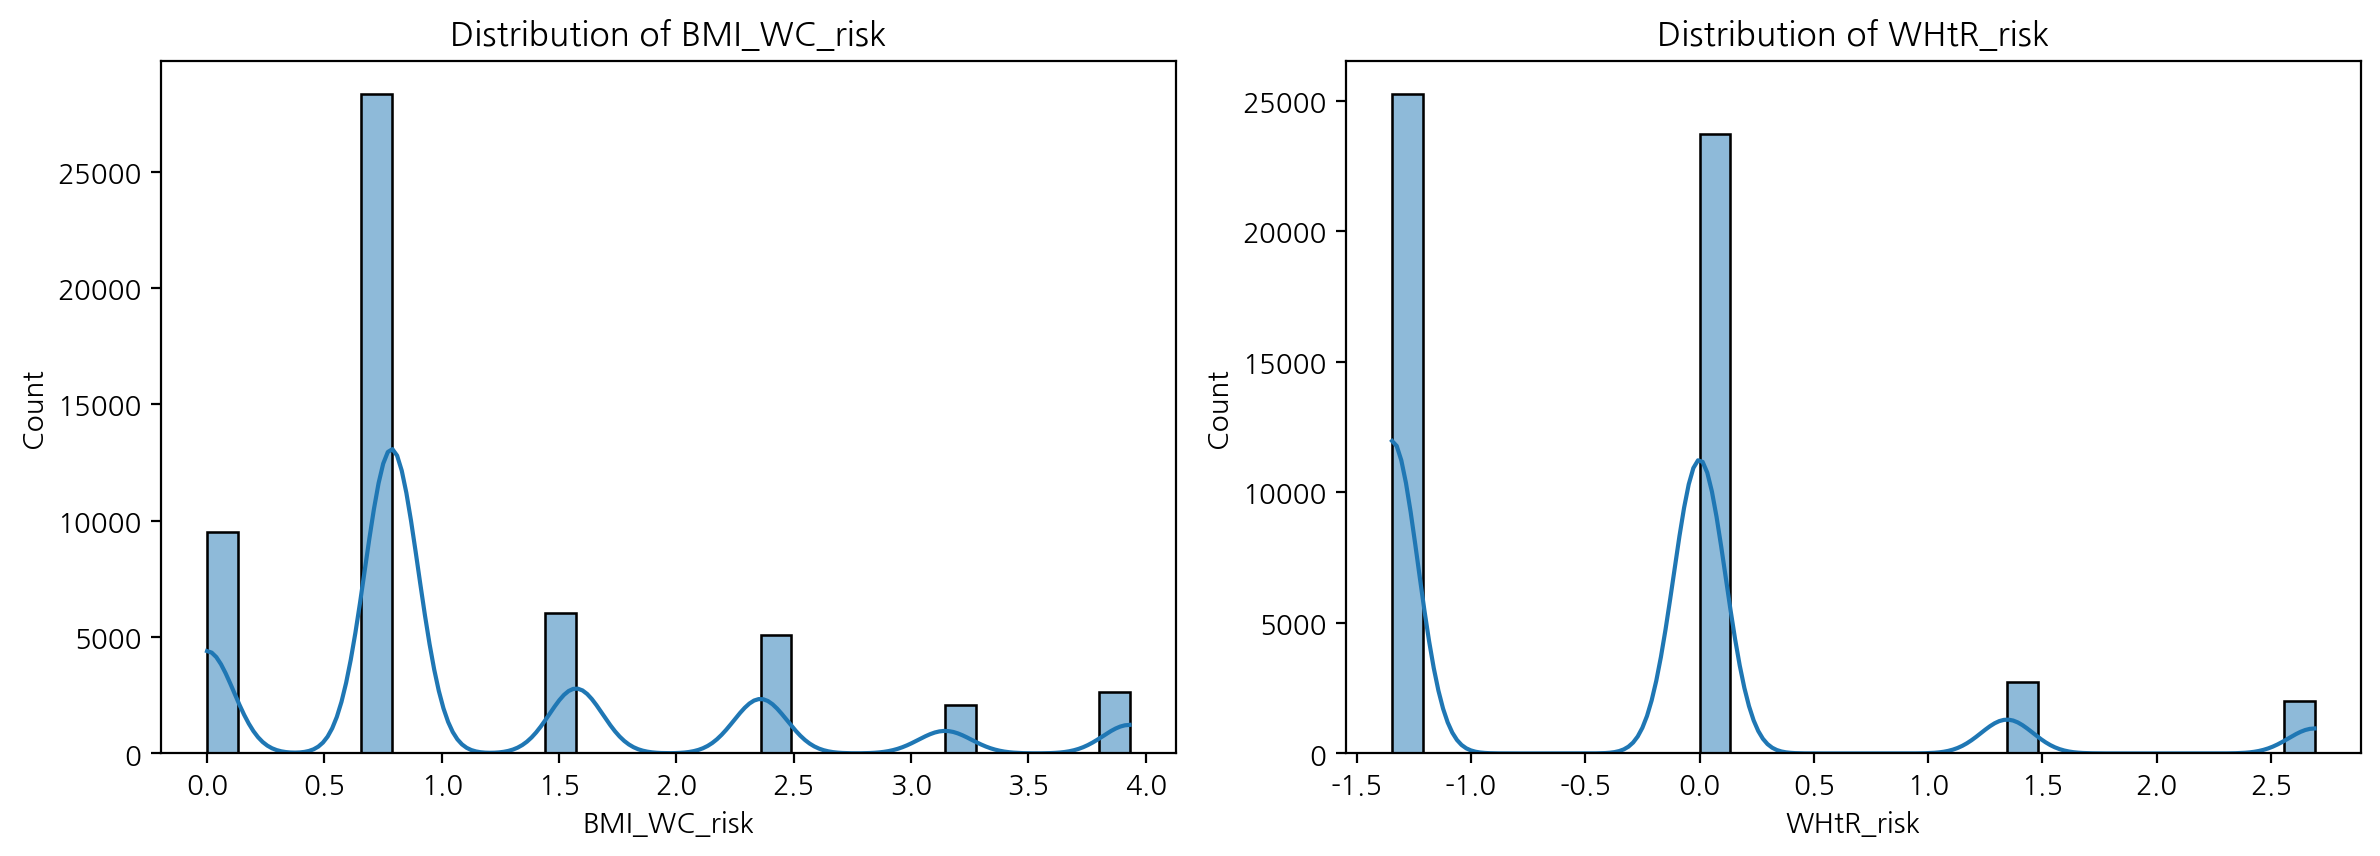

In [22]:
columns = ['BMI_WC_risk', 'WHtR_risk']

# 히스토그램과 커널 밀도 추정 그래프를 함께 그리기
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [23]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Obesity_group[['BMI_WC_risk']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Obesity_group['BMI_WC_risk_group'] = Obesity_group['BMI_WC_risk'].apply(assign_group)

Obesity_group[['BMI_WC_risk', 'BMI_WC_risk_group']]

C:\Users\sim\AppData\Local\Temp\ipykernel_1816\293260448.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Obesity_group['BMI_WC_risk_group'] = Obesity_group['BMI_WC_risk'].apply(assign_group)


,BMI_WC_risk,BMI_WC_risk_group
0,0.000000,Low
1,0.786243,Low
2,2.358728,Very High
3,0.786243,Low
4,0.786243,Low
...,...,...
53719,0.000000,Low
53720,0.786243,Low
53721,2.358728,Very High
53722,0.786243,Low


In [24]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Obesity_group[['WHtR_risk']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Obesity_group['WHtR_risk_group'] = Obesity_group['WHtR_risk'].apply(assign_group)

Obesity_group[['WHtR_risk', 'WHtR_risk_group']]

C:\Users\sim\AppData\Local\Temp\ipykernel_1816\2401863591.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Obesity_group['WHtR_risk_group'] = Obesity_group['WHtR_risk'].apply(assign_group)


,WHtR_risk,WHtR_risk_group
0,-1.345029,Low
1,0.000000,Moderate
2,0.000000,Moderate
3,-1.345029,Low
4,-1.345029,Low
...,...,...
53719,-1.345029,Low
53720,0.000000,Moderate
53721,0.000000,Moderate
53722,-1.345029,Low


In [25]:
def classify(row):
    # 체중 증량 필요
    if row['BMI_WC_risk_group'] == 'Low' and row['WHtR_risk_group'] == 'Low':
        return 'Weight gain needed'
    
    # 정상
    elif (row['BMI_WC_risk_group'] in ['Low', 'Moderate'] and
          row['WHtR_risk_group'] in ['Low', 'Moderate']):
        return 'Normal'
    
    # 체중 감량 필요
    elif (row['BMI_WC_risk_group'] in ['High', 'Very High'] or 
          row['WHtR_risk_group'] in ['High', 'Very High']):
        return 'Weight loss needed'
    
    # 기본 값 (혹시 추가적인 조건이 필요한 경우)
    else:
        return 'Normal'

# '분류' 열 생성
Obesity_group['분류'] = Obesity_group.apply(classify, axis=1)

# 결과 확인
Obesity_group

C:\Users\sim\AppData\Local\Temp\ipykernel_1816\332408.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Obesity_group['분류'] = Obesity_group.apply(classify, axis=1)


,BMI_WC_risk,WHtR_risk,BMI_WC_risk_group,WHtR_risk_group,분류
0,0.000000,-1.345029,Low,Low,Weight gain needed
1,0.786243,0.000000,Low,Moderate,Normal
2,2.358728,0.000000,Very High,Moderate,Weight loss needed
3,0.786243,-1.345029,Low,Low,Weight gain needed
4,0.786243,-1.345029,Low,Low,Weight gain needed
...,...,...,...,...,...
53719,0.000000,-1.345029,Low,Low,Weight gain needed
53720,0.786243,0.000000,Low,Moderate,Normal
53721,2.358728,0.000000,Very High,Moderate,Weight loss needed
53722,0.786243,-1.345029,Low,Low,Weight gain needed


In [26]:
Obesity_group['분류'].value_counts()

분류
Weight gain needed    24462
Weight loss needed    15931
Normal                13331
Name: count, dtype: int64

### Smoking_Alcohol 그룹핑

In [27]:
Smoking_Alcohol_group['흡연상태'].value_counts()
# 0.000000 : 비흡연, 1.758928  : 끊음, 3.517855 : 흡연중

흡연상태
0.000000    46796
3.517855     4255
1.758928     2673
Name: count, dtype: int64

In [28]:
Smoking_Alcohol_group['음주여부'].value_counts()
# 0.000000 : 비음주, 2.731847 : 음주

음주여부
2.731847    45161
0.000000     8563
Name: count, dtype: int64

In [29]:
def classify(row):
    # '흡연상태'가 0.0 또는 1.758928 근처이고, '음주여부'가 0.0 근처이면 'healthy'
    if np.isclose(row['흡연상태'], [0.0, 1.7589289], atol=1e-6).any() and np.isclose(row['음주여부'], 0.0, atol=1e-6):
        return 'healthy'
    # '흡연상태'가 3.517855 근처이고, '음주여부'가 2.731847 근처이면 'Smoking and Alcohol'
    elif np.isclose(row['흡연상태'], 3.517855, atol=1e-6) and np.isclose(row['음주여부'], 2.731847, atol=1e-6):
        return 'Smoking and Alcohol'
    # '흡연상태'가 3.517855 근처이고, '음주여부'가 0.0 근처이면 'Smoking'
    elif np.isclose(row['흡연상태'], 3.517855, atol=1e-6) and np.isclose(row['음주여부'], 0.0, atol=1e-6):
        return 'Smoking'
    # '음주여부'가 2.731847 근처이고, '흡연상태'가 0.0 또는 1.758928 근처이면 'Alcohol'
    elif np.isclose(row['음주여부'], 2.731847, atol=1e-6) and np.isclose(row['흡연상태'], [0.0, 1.758928], atol=1e-6).any():
        return 'Alcohol'
    # 그 외는 'Unknown'
    else:
        return 'Unknown'

# '분류' 열 생성
Smoking_Alcohol_group['분류'] = Smoking_Alcohol_group.apply(classify, axis=1)

# 결과 확인
print(Smoking_Alcohol_group['분류'].value_counts())

분류
Alcohol                41234
healthy                 8235
Smoking and Alcohol     3927
Smoking                  328
Name: count, dtype: int64


C:\Users\sim\AppData\Local\Temp\ipykernel_1816\753315916.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Smoking_Alcohol_group['분류'] = Smoking_Alcohol_group.apply(classify, axis=1)


### Vision_group 그룹핑

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


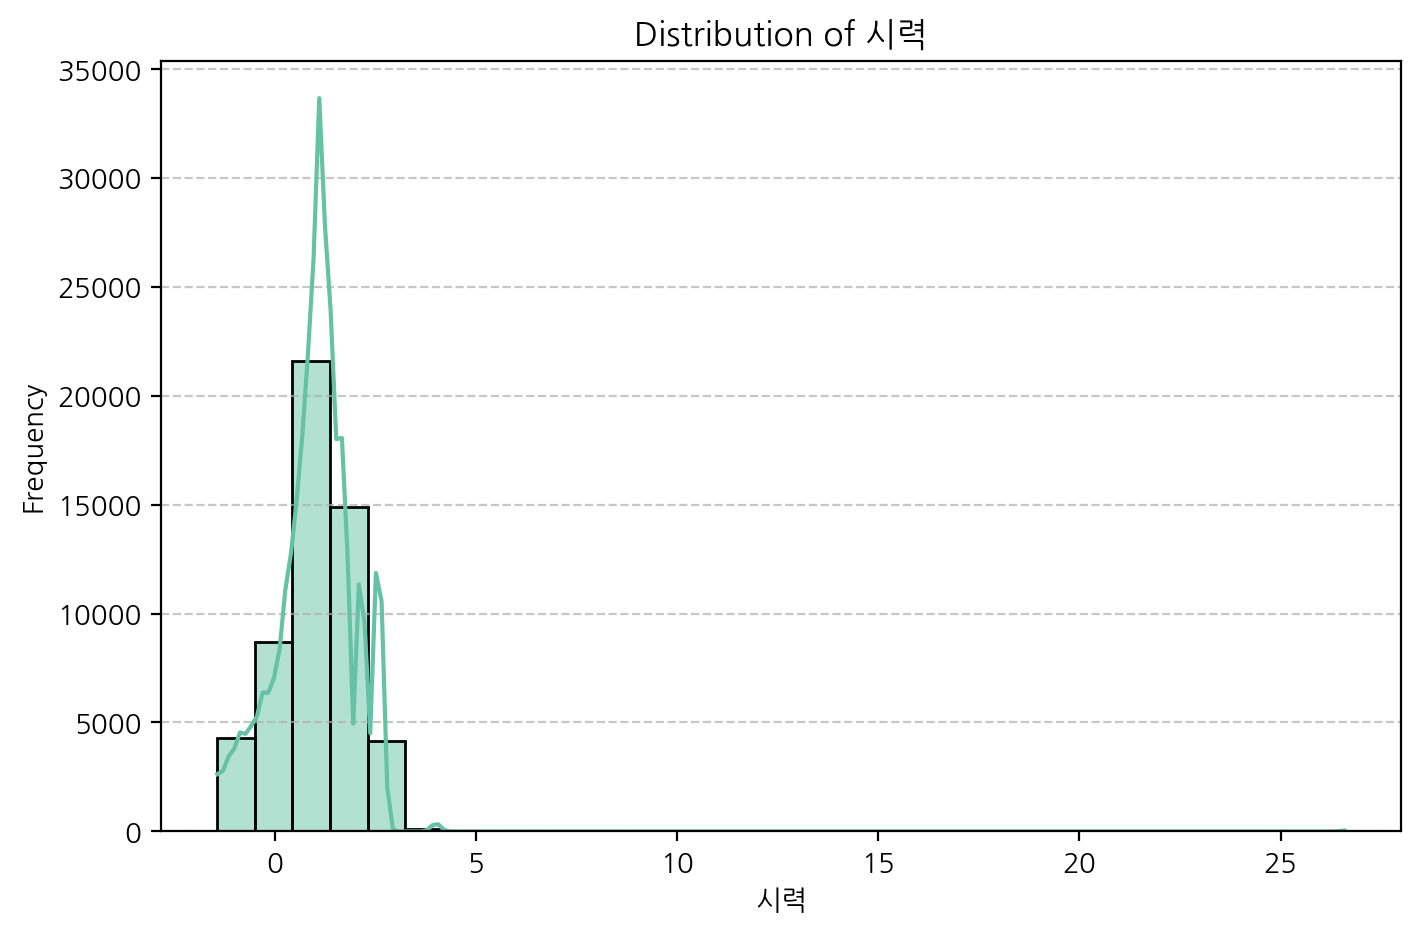

In [30]:
# 시력 분포 시각화
plt.figure(figsize=(8, 5))
sns.histplot(Vision_group['시력'],kde=True, bins=30, color='#66c2a5', edgecolor='black')
plt.title('Distribution of 시력')
plt.xlabel('시력')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

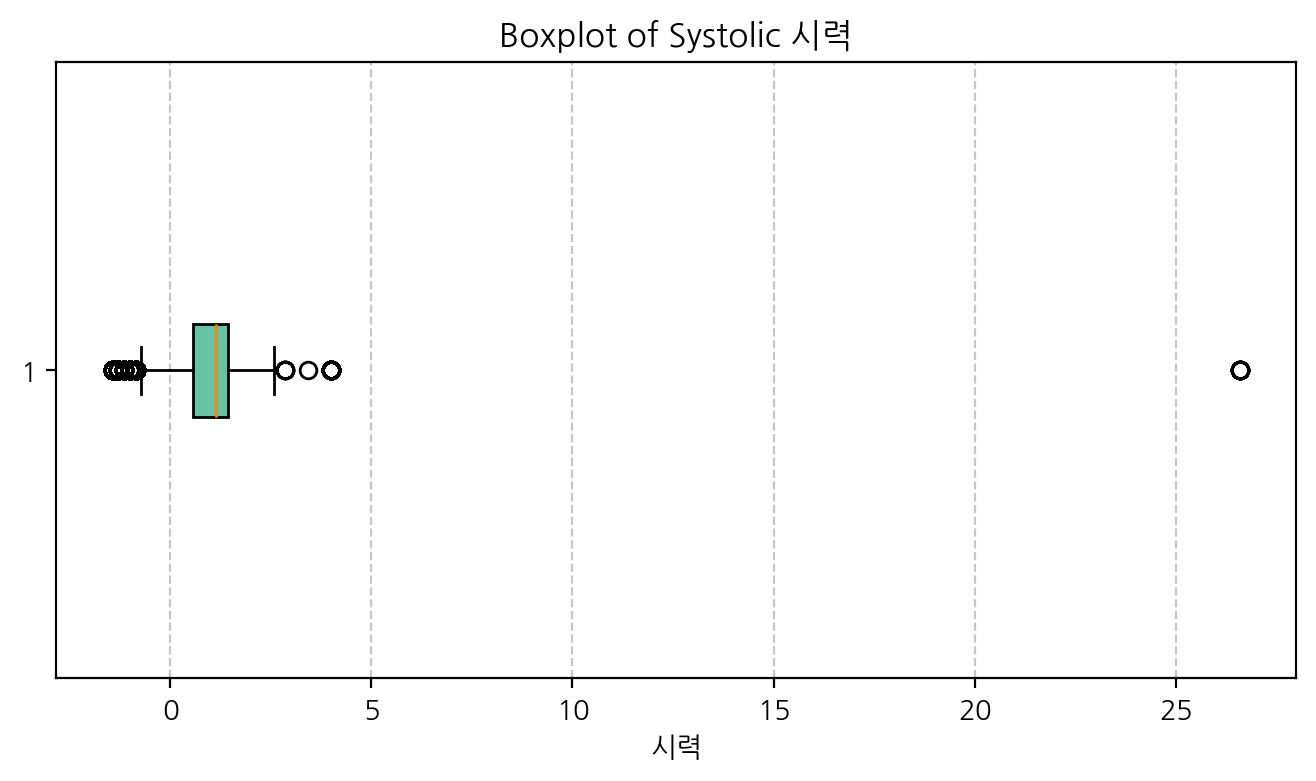

In [31]:
# 박스플롯 그리기
plt.figure(figsize=(8, 4))
plt.boxplot(Vision_group['시력'], patch_artist=True, vert=False, boxprops=dict(facecolor='#66c2a5', color='black'))
plt.title('Boxplot of Systolic 시력')
plt.xlabel('시력')
plt.grid(axis='x', linestyle='--', alpha=0.7)

In [32]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Vision_group[['시력']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Vision_group['시력_group'] = Vision_group['시력'].apply(assign_group)


Vision_group

C:\Users\sim\AppData\Local\Temp\ipykernel_1816\976081901.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vision_group['시력_group'] = Vision_group['시력'].apply(assign_group)


,시력,시력_group
0,1.429693,High
1,1.715631,Very High
2,1.143754,Moderate
3,0.571877,Low
4,1.000785,Moderate
...,...,...
53719,2.573447,Very High
53720,-0.142969,Low
53721,1.429693,High
53722,1.429693,High


In [33]:
print(q1, q2, q3)

0.5718770147034149 1.1437540294068296 1.4296925367585371


In [34]:
Vision_group['시력_group'].value_counts()

시력_group
Moderate     17367
Low          15601
Very High    13415
High          7341
Name: count, dtype: int64

In [35]:
def classify_Vision(row):
    if row['시력_group'] in ['Low', 'Moderate']:
        return 'Vision risk'
    else:
        return 'Normal'

# 새로운 변수 '분류'에 조건에 따른 값을 채움
Vision_group['분류'] = Vision_group.apply(classify_Vision, axis=1)
Vision_group

C:\Users\sim\AppData\Local\Temp\ipykernel_1816\3978749390.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vision_group['분류'] = Vision_group.apply(classify_Vision, axis=1)


,시력,시력_group,분류
0,1.429693,High,Normal
1,1.715631,Very High,Normal
2,1.143754,Moderate,Vision risk
3,0.571877,Low,Vision risk
4,1.000785,Moderate,Vision risk
...,...,...,...
53719,2.573447,Very High,Normal
53720,-0.142969,Low,Vision risk
53721,1.429693,High,Normal
53722,1.429693,High,Normal


In [36]:
Vision_group['분류'].value_counts()

분류
Vision risk    32968
Normal         20756
Name: count, dtype: int64

### Hearing_group 그룹핑

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


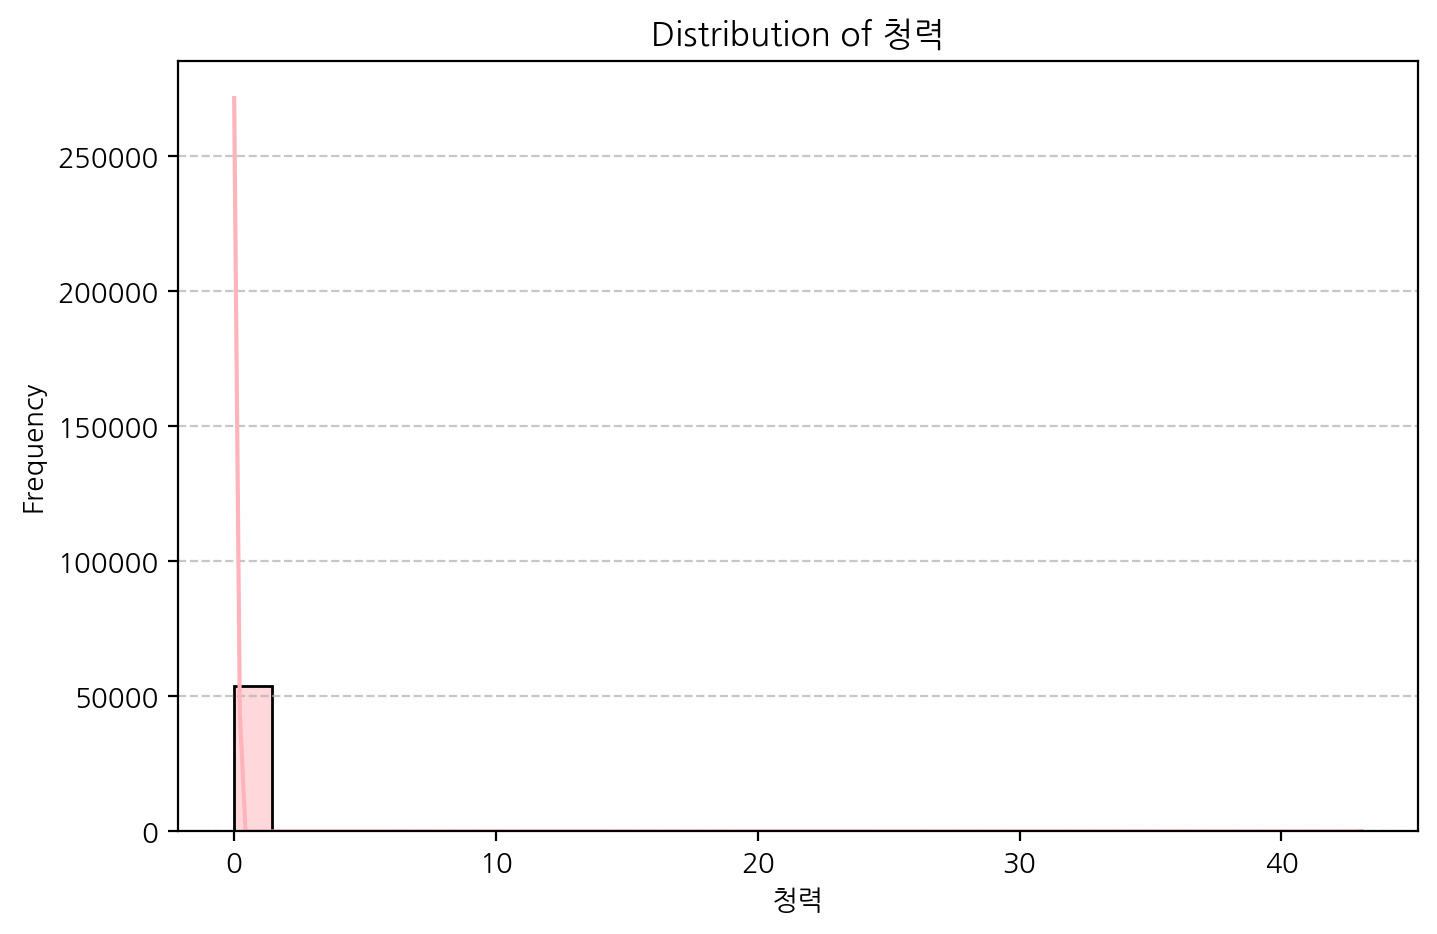

In [37]:
# 청력 분포 시각화
plt.figure(figsize=(8, 5))
sns.histplot(Hearing_group['청력'], bins=30, color='#FFB3BA', edgecolor='black',kde=True)
plt.title('Distribution of 청력')
plt.xlabel('청력')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [38]:
Hearing_group.value_counts()
# 0.000000 : 정상, 43.053301 : 청력 위험

청력       
0.000000     53695
43.053301       29
Name: count, dtype: int64

청력이 0 이면 Normal, 43.053301이면 Hearing risk으로 분류

In [39]:
# 분류 열 생성
Hearing_group['분류'] = Hearing_group['청력'].apply(lambda x: 'Normal' if x == 0.000000 else 'Hearing risk')

# 결과 확인
Hearing_group

C:\Users\sim\AppData\Local\Temp\ipykernel_1816\205143681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hearing_group['분류'] = Hearing_group['청력'].apply(lambda x: 'Normal' if x == 0.000000 else 'Hearing risk')


,청력,분류
0,0.0,Normal
1,0.0,Normal
2,0.0,Normal
3,0.0,Normal
4,0.0,Normal
...,...,...
53719,0.0,Normal
53720,0.0,Normal
53721,0.0,Normal
53722,0.0,Normal


In [40]:
Hearing_group['분류'].value_counts()

분류
Normal          53695
Hearing risk       29
Name: count, dtype: int64

### Diabetes 그룹핑

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

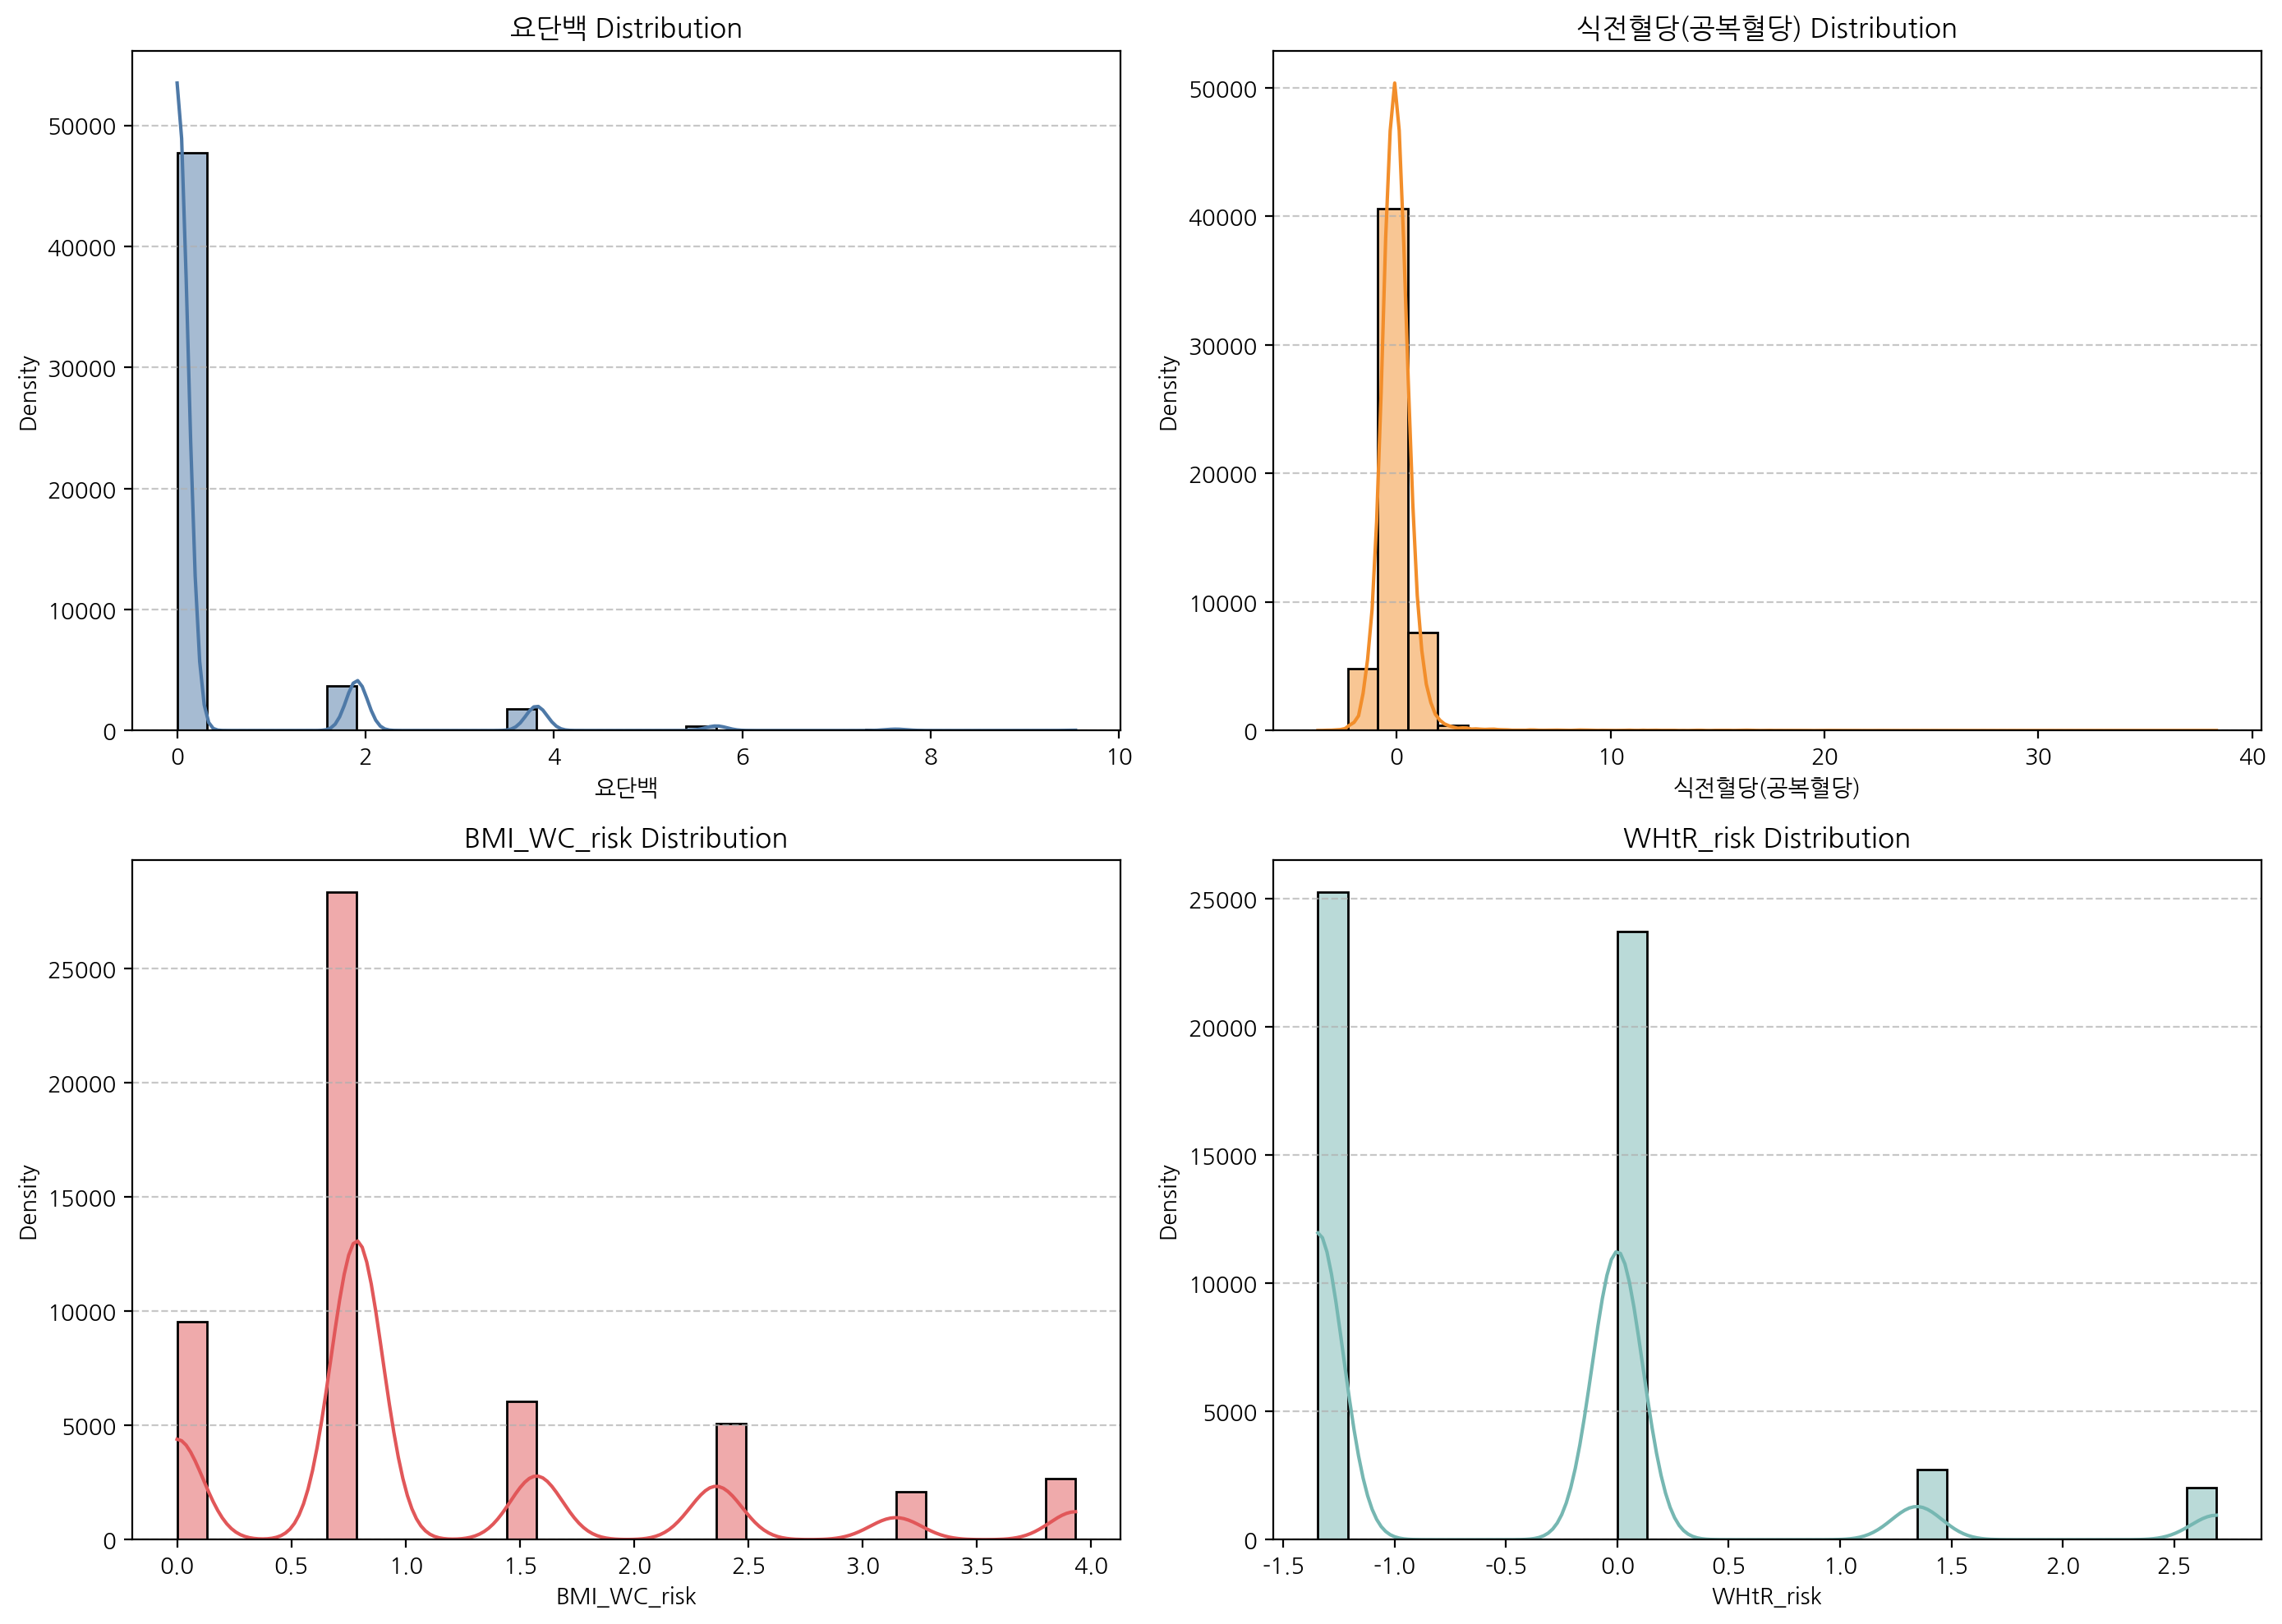

In [41]:
plt.figure(figsize=(14, 10))
variables = ['요단백', '식전혈당(공복혈당)', 'BMI_WC_risk', 'WHtR_risk']
colors = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2']

# 각 변수에 대해 히스토그램과 KDE 그래프 생성
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.histplot(Diabetes_group[var], kde=True, color=colors[i-1], bins=30)
    plt.title(f'{var} Distribution')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [42]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Diabetes_group[['요단백']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Diabetes_group['요단백_group'] = Diabetes_group['요단백'].apply(assign_group)

Diabetes_group[['요단백', '요단백_group']]

C:\Users\sim\AppData\Local\Temp\ipykernel_1816\3104202044.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Diabetes_group['요단백_group'] = Diabetes_group['요단백'].apply(assign_group)


,요단백,요단백_group
0,0.000000,Low
1,0.000000,Low
2,0.000000,Low
3,0.000000,Low
4,0.000000,Low
...,...,...
53719,0.000000,Low
53720,0.000000,Low
53721,0.000000,Low
53722,0.000000,Low


In [43]:
Diabetes_group['요단백_group'].value_counts()

요단백_group
Low          47756
Very High     5968
Name: count, dtype: int64

In [44]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Diabetes_group[['식전혈당(공복혈당)']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Diabetes_group['식전혈당_group'] = Diabetes_group['식전혈당(공복혈당)'].apply(assign_group)

Diabetes_group[['식전혈당(공복혈당)', '식전혈당_group']]

C:\Users\sim\AppData\Local\Temp\ipykernel_1816\3331848173.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Diabetes_group['식전혈당_group'] = Diabetes_group['식전혈당(공복혈당)'].apply(assign_group)


,식전혈당(공복혈당),식전혈당_group
0,0.224958,High
1,0.000000,High
2,1.799664,Very High
3,-0.974818,Low
4,-0.074986,Moderate
...,...,...
53719,0.899832,Very High
53720,0.224958,High
53721,-0.374930,Moderate
53722,0.224958,High


In [45]:
print(q1, q2, q3)

-0.4499160464279695 -0.0749860077379949 0.3749300386899746


In [46]:
Diabetes_group['식전혈당_group'].value_counts()

식전혈당_group
Low          14854
High         14224
Moderate     13081
Very High    11565
Name: count, dtype: int64

In [47]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Diabetes_group[['BMI_WC_risk']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Diabetes_group['BMI_WC_risk_group'] = Diabetes_group['BMI_WC_risk'].apply(assign_group)

Diabetes_group[['BMI_WC_risk', 'BMI_WC_risk_group']]

C:\Users\sim\AppData\Local\Temp\ipykernel_1816\1371003698.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Diabetes_group['BMI_WC_risk_group'] = Diabetes_group['BMI_WC_risk'].apply(assign_group)


,BMI_WC_risk,BMI_WC_risk_group
0,0.000000,Low
1,0.786243,Low
2,2.358728,Very High
3,0.786243,Low
4,0.786243,Low
...,...,...
53719,0.000000,Low
53720,0.786243,Low
53721,2.358728,Very High
53722,0.786243,Low


In [48]:
print(q1, q2, q3)

0.7862426475266237 0.7862426475266237 1.5724852950532473


In [49]:
Diabetes_group['BMI_WC_risk_group'].value_counts()

BMI_WC_risk_group
Low          37857
Very High     9826
High          6041
Name: count, dtype: int64

In [50]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Diabetes_group[['WHtR_risk']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Diabetes_group['WHtR_risk_group'] = Diabetes_group['WHtR_risk'].apply(assign_group)

Diabetes_group[['WHtR_risk', 'WHtR_risk_group']]

C:\Users\sim\AppData\Local\Temp\ipykernel_1816\3251133969.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Diabetes_group['WHtR_risk_group'] = Diabetes_group['WHtR_risk'].apply(assign_group)


,WHtR_risk,WHtR_risk_group
0,-1.345029,Low
1,0.000000,Moderate
2,0.000000,Moderate
3,-1.345029,Low
4,-1.345029,Low
...,...,...
53719,-1.345029,Low
53720,0.000000,Moderate
53721,0.000000,Moderate
53722,-1.345029,Low


In [51]:
print(q1, q2, q3)

-1.3450287289852407 0.0 0.0


In [52]:
Diabetes_group['WHtR_risk_group'].value_counts()

WHtR_risk_group
Low          25248
Moderate     23725
Very High     4751
Name: count, dtype: int64

In [53]:
Diabetes_group

,요단백,식전혈당(공복혈당),BMI_WC_risk,WHtR_risk,요단백_group,식전혈당_group,BMI_WC_risk_group,WHtR_risk_group
0,0.000000,0.224958,0.000000,-1.345029,Low,High,Low,Low
1,0.000000,0.000000,0.786243,0.000000,Low,High,Low,Moderate
2,0.000000,1.799664,2.358728,0.000000,Low,Very High,Very High,Moderate
3,0.000000,-0.974818,0.786243,-1.345029,Low,Low,Low,Low
4,0.000000,-0.074986,0.786243,-1.345029,Low,Moderate,Low,Low
...,...,...,...,...,...,...,...,...
53719,0.000000,0.899832,0.000000,-1.345029,Low,Very High,Low,Low
53720,0.000000,0.224958,0.786243,0.000000,Low,High,Low,Moderate
53721,0.000000,-0.374930,2.358728,0.000000,Low,Moderate,Very High,Moderate
53722,0.000000,0.224958,0.786243,-1.345029,Low,High,Low,Low


In [54]:
def classify(row):
    # 위험 기준 설정: 하나라도 'High' 또는 'Very High'일 경우 '위험'
    if (row['요단백_group'] in ['High', 'Very High'] or 
        row['식전혈당_group'] in ['High', 'Very High'] or 
        row['BMI_WC_risk_group'] in ['High', 'Very High'] or 
        row['WHtR_risk_group'] in ['High', 'Very High']):
        return 'Suspected Diabetes'
    else:
        return 'Normal'

# '분류' 열 생성
Diabetes_group['분류'] = Diabetes_group.apply(classify, axis=1)

# 결과 확인
Diabetes_group

C:\Users\sim\AppData\Local\Temp\ipykernel_1816\2308475523.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Diabetes_group['분류'] = Diabetes_group.apply(classify, axis=1)


,요단백,식전혈당(공복혈당),BMI_WC_risk,WHtR_risk,요단백_group,식전혈당_group,BMI_WC_risk_group,WHtR_risk_group,분류
0,0.000000,0.224958,0.000000,-1.345029,Low,High,Low,Low,Suspected Diabetes
1,0.000000,0.000000,0.786243,0.000000,Low,High,Low,Moderate,Suspected Diabetes
2,0.000000,1.799664,2.358728,0.000000,Low,Very High,Very High,Moderate,Suspected Diabetes
3,0.000000,-0.974818,0.786243,-1.345029,Low,Low,Low,Low,Normal
4,0.000000,-0.074986,0.786243,-1.345029,Low,Moderate,Low,Low,Normal
...,...,...,...,...,...,...,...,...,...
53719,0.000000,0.899832,0.000000,-1.345029,Low,Very High,Low,Low,Suspected Diabetes
53720,0.000000,0.224958,0.786243,0.000000,Low,High,Low,Moderate,Suspected Diabetes
53721,0.000000,-0.374930,2.358728,0.000000,Low,Moderate,Very High,Moderate,Suspected Diabetes
53722,0.000000,0.224958,0.786243,-1.345029,Low,High,Low,Low,Suspected Diabetes


In [55]:
Diabetes_group['분류'].value_counts()

분류
Suspected Diabetes    34999
Normal                18725
Name: count, dtype: int64

### Cardiovascular 그룹핑

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

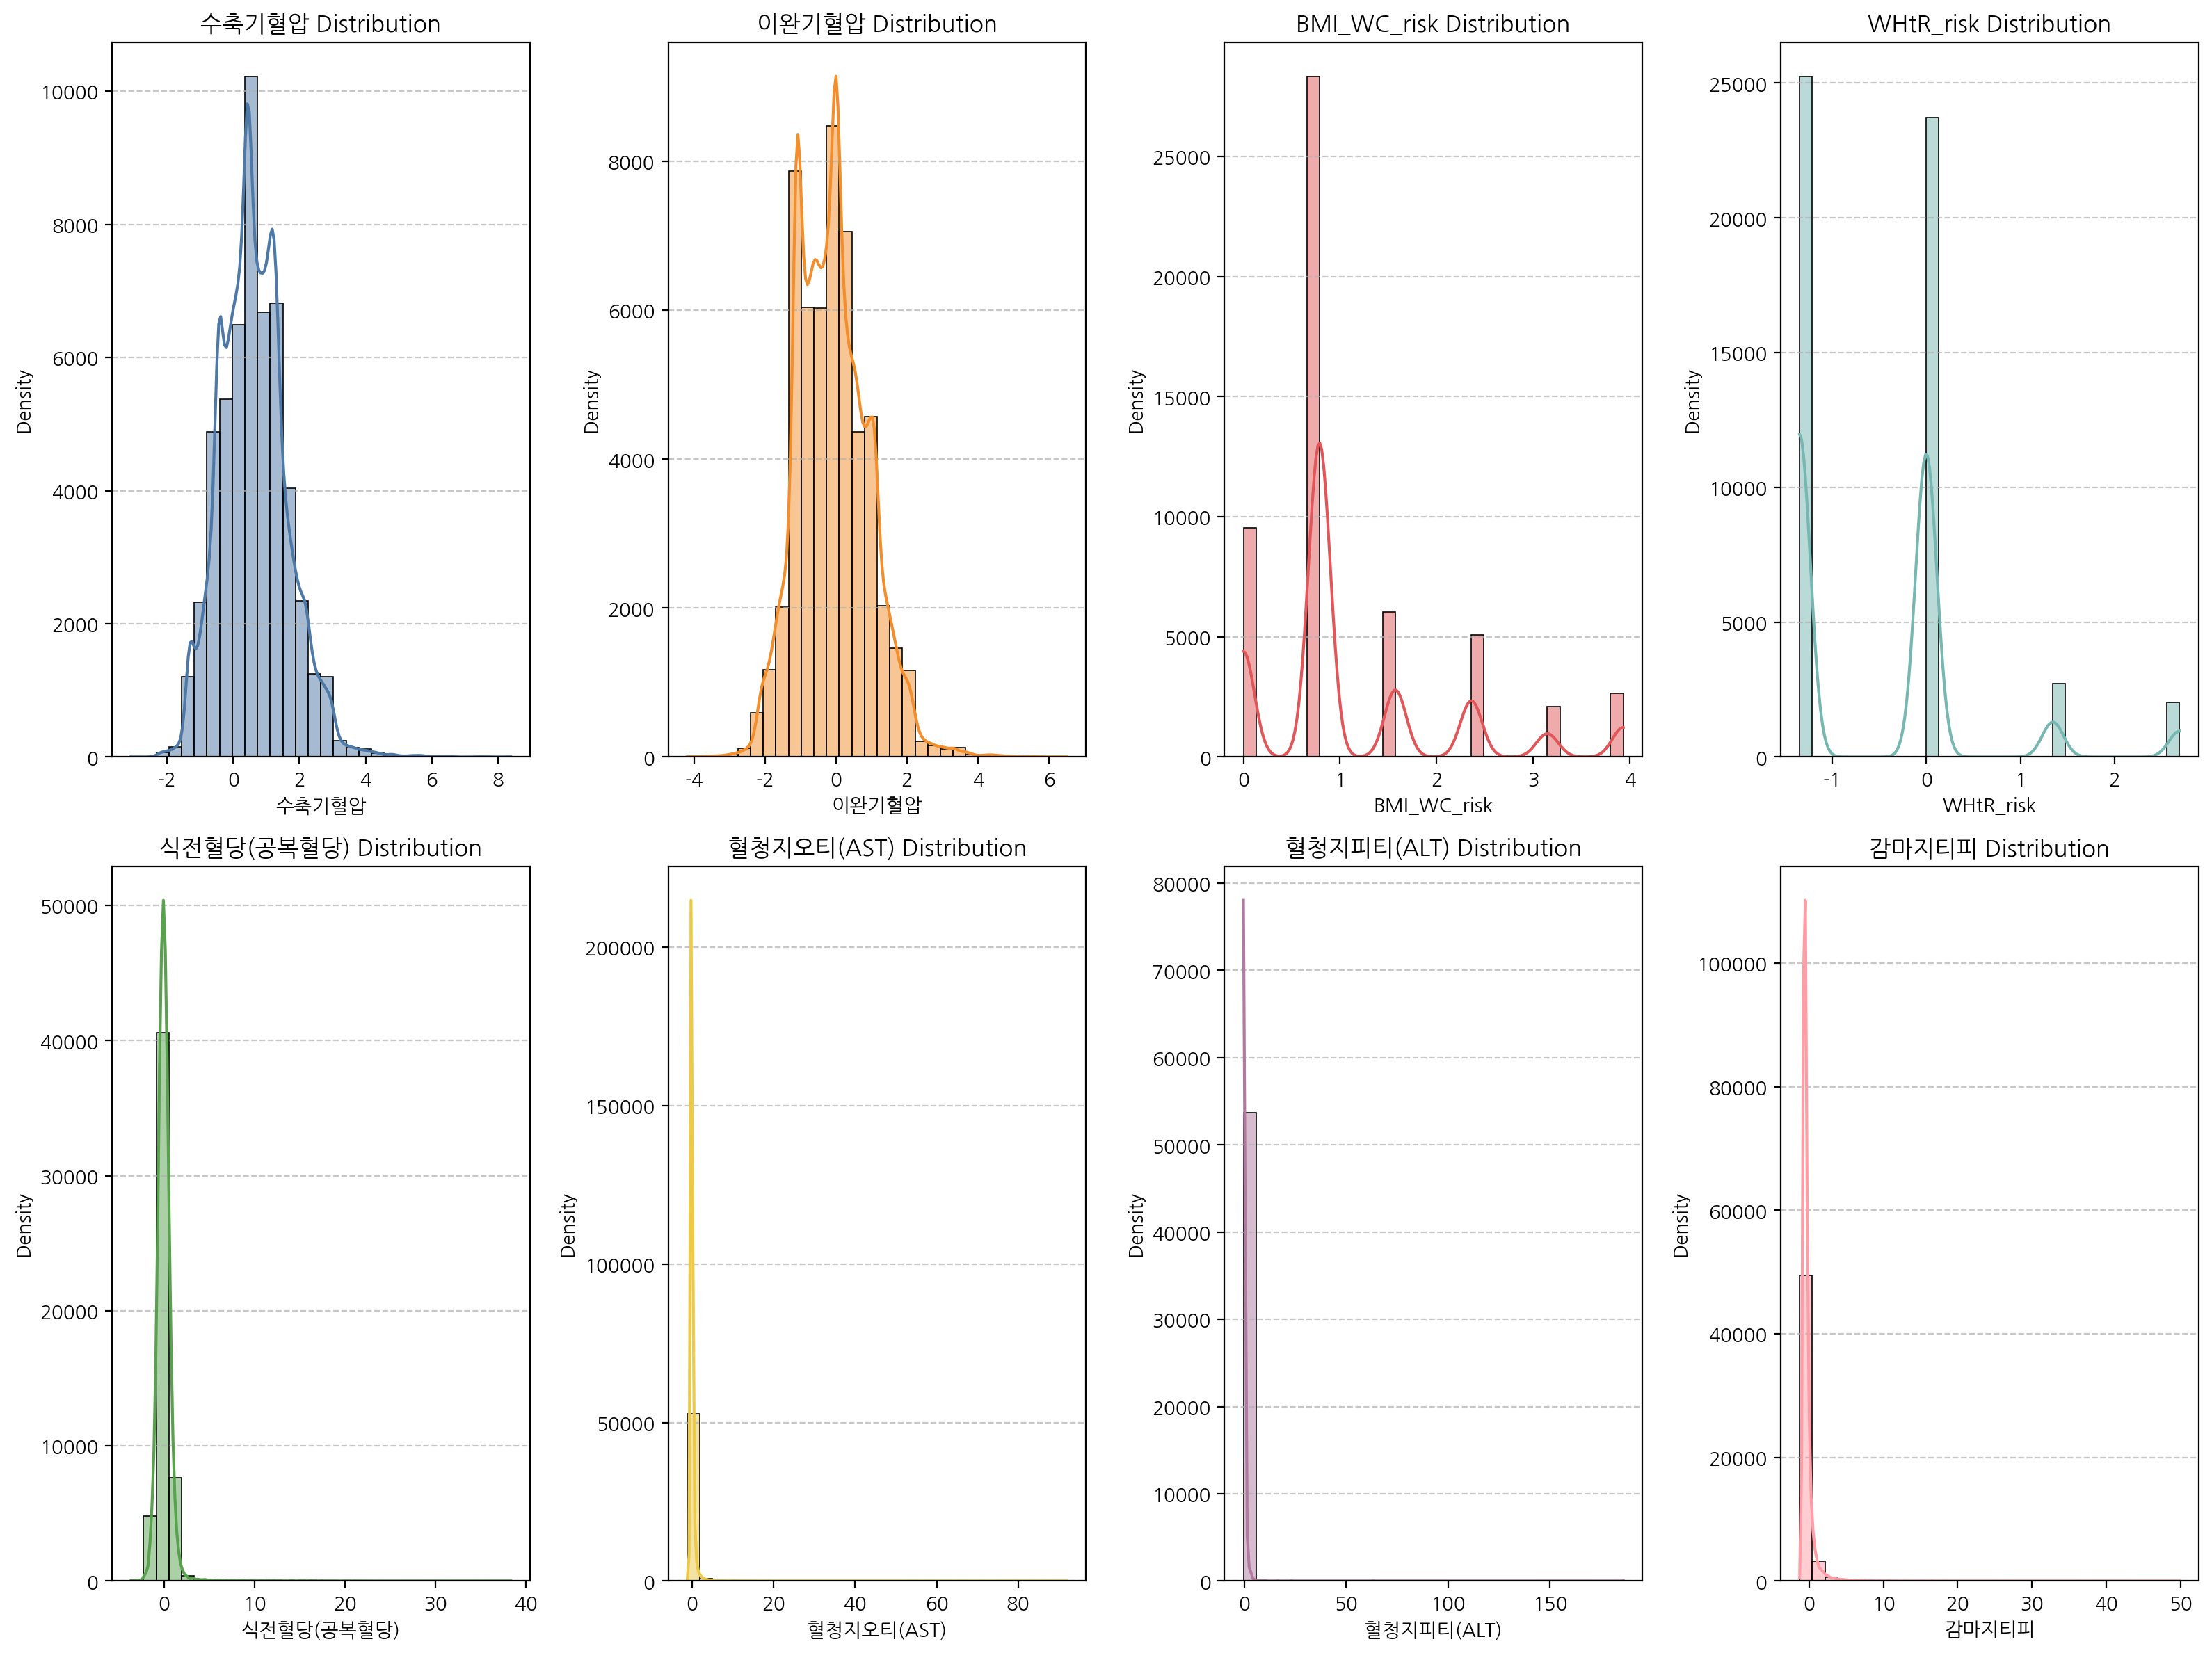

In [56]:
# 그래프 설정
plt.figure(figsize=(16, 12))
variables = [
    '수축기혈압', '이완기혈압', 
    'BMI_WC_risk', 'WHtR_risk', 
    '식전혈당(공복혈당)', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피'
]
colors = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2', '#59a14f', '#edc948', '#b07aa1', '#ff9da7'] 

# 각 변수에 대해 히스토그램 생성
for i, var in enumerate(variables, 1):
    plt.subplot(2, 4, i)
    sns.histplot(Cardiovascular_group[var], kde=True, color=colors[i-1], bins=30)
    plt.title(f'{var} Distribution')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [57]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Cardiovascular_group[['수축기혈압']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Cardiovascular_group['수축기혈압_group'] = Cardiovascular_group['수축기혈압'].apply(assign_group)

Cardiovascular_group[['수축기혈압', '수축기혈압_group']]

C:\Users\sim\AppData\Local\Temp\ipykernel_1816\3990203562.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cardiovascular_group['수축기혈압_group'] = Cardiovascular_group['수축기혈압'].apply(assign_group)


,수축기혈압,수축기혈압_group
0,-1.147266,Low
1,0.353005,Moderate
2,4.147807,Very High
3,0.794261,High
4,1.676773,Very High
...,...,...
53719,1.323768,Very High
53720,2.029778,Very High
53721,1.853275,Very High
53722,-0.441256,Low


In [58]:
print(q1,q2,q3)

-0.0882512140833768 0.5295072845002589 1.2355169971672708


In [59]:
Cardiovascular_group['수축기혈압_group'].value_counts()

수축기혈압_group
Low          14013
High         13966
Moderate     13330
Very High    12415
Name: count, dtype: int64

In [60]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Cardiovascular_group[['이완기혈압']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Cardiovascular_group['이완기혈압_group'] = Cardiovascular_group['이완기혈압'].apply(assign_group)

Cardiovascular_group[['이완기혈압', '이완기혈압_group']]

C:\Users\sim\AppData\Local\Temp\ipykernel_1816\2906457348.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cardiovascular_group['이완기혈압_group'] = Cardiovascular_group['이완기혈압'].apply(assign_group)


,이완기혈압,이완기혈압_group
0,-1.102393,Low
1,-0.330718,Moderate
2,2.315025,Very High
3,-0.330718,Moderate
4,0.881914,Very High
...,...,...
53719,0.000000,High
53720,0.771675,Very High
53721,0.992153,Very High
53722,-0.992153,Low


In [61]:
print(q1,q2,q3)

-0.8819141783991192 -0.1102392722998898 0.5511963614994495


In [62]:
Cardiovascular_group['이완기혈압_group'].value_counts()

이완기혈압_group
Moderate     14114
Low          13910
High         13048
Very High    12652
Name: count, dtype: int64

In [63]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Cardiovascular_group[['BMI_WC_risk']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Cardiovascular_group['BMI_WC_risk_group'] = Cardiovascular_group['BMI_WC_risk'].apply(assign_group)

Cardiovascular_group[['BMI_WC_risk', 'BMI_WC_risk_group']]

C:\Users\sim\AppData\Local\Temp\ipykernel_1816\2484406126.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cardiovascular_group['BMI_WC_risk_group'] = Cardiovascular_group['BMI_WC_risk'].apply(assign_group)


,BMI_WC_risk,BMI_WC_risk_group
0,0.000000,Low
1,0.786243,Low
2,2.358728,Very High
3,0.786243,Low
4,0.786243,Low
...,...,...
53719,0.000000,Low
53720,0.786243,Low
53721,2.358728,Very High
53722,0.786243,Low


In [64]:
print(q1,q2,q3)

0.7862426475266237 0.7862426475266237 1.5724852950532473


In [65]:
Cardiovascular_group['BMI_WC_risk_group'].value_counts()

BMI_WC_risk_group
Low          37857
Very High     9826
High          6041
Name: count, dtype: int64

In [66]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Cardiovascular_group[['WHtR_risk']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Cardiovascular_group['WHtR_risk_group'] = Cardiovascular_group['WHtR_risk'].apply(assign_group)

Cardiovascular_group[['WHtR_risk', 'WHtR_risk_group']]

C:\Users\sim\AppData\Local\Temp\ipykernel_1816\2300125776.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cardiovascular_group['WHtR_risk_group'] = Cardiovascular_group['WHtR_risk'].apply(assign_group)


,WHtR_risk,WHtR_risk_group
0,-1.345029,Low
1,0.000000,Moderate
2,0.000000,Moderate
3,-1.345029,Low
4,-1.345029,Low
...,...,...
53719,-1.345029,Low
53720,0.000000,Moderate
53721,0.000000,Moderate
53722,-1.345029,Low


In [67]:
print(q1,q2,q3)

-1.3450287289852407 0.0 0.0


In [68]:
Cardiovascular_group['WHtR_risk_group'].value_counts()

WHtR_risk_group
Low          25248
Moderate     23725
Very High     4751
Name: count, dtype: int64

In [69]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Cardiovascular_group[['식전혈당(공복혈당)']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Cardiovascular_group['식전혈당(공복혈당)_group'] = Cardiovascular_group['식전혈당(공복혈당)'].apply(assign_group)

Cardiovascular_group[['식전혈당(공복혈당)', '식전혈당(공복혈당)_group']]

C:\Users\sim\AppData\Local\Temp\ipykernel_1816\47368446.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cardiovascular_group['식전혈당(공복혈당)_group'] = Cardiovascular_group['식전혈당(공복혈당)'].apply(assign_group)


,식전혈당(공복혈당),식전혈당(공복혈당)_group
0,0.224958,High
1,0.000000,High
2,1.799664,Very High
3,-0.974818,Low
4,-0.074986,Moderate
...,...,...
53719,0.899832,Very High
53720,0.224958,High
53721,-0.374930,Moderate
53722,0.224958,High


In [70]:
print(q1,q2,q3)

-0.4499160464279695 -0.0749860077379949 0.3749300386899746


In [71]:
Cardiovascular_group['식전혈당(공복혈당)_group'].value_counts()

식전혈당(공복혈당)_group
Low          14854
High         14224
Moderate     13081
Very High    11565
Name: count, dtype: int64

In [72]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Cardiovascular_group[['혈청지오티(AST)']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Cardiovascular_group['혈청지오티(AST)_group'] = Cardiovascular_group['혈청지오티(AST)'].apply(assign_group)

Cardiovascular_group[['혈청지오티(AST)', '혈청지오티(AST)_group']]

C:\Users\sim\AppData\Local\Temp\ipykernel_1816\2276222144.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Cardiovascular_group['혈청지오티(AST)_group'] = Cardiovascular_group['혈청지오티(AST)'].apply(assign_group)


,혈청지오티(AST),혈청지오티(AST)_group
0,-0.260650,Moderate
1,-0.521301,Low
2,0.065163,High
3,-0.130325,Moderate
4,0.195488,Very High
...,...,...
53719,-0.065163,High
53720,-0.130325,Moderate
53721,-0.260650,Moderate
53722,0.000000,High


In [73]:
print(q1,q2,q3)

-0.3258129995680908 -0.1303251998272363 0.0651625999136181


In [74]:
Cardiovascular_group['혈청지오티(AST)_group'].value_counts()

혈청지오티(AST)_group
Moderate     16322
Low          13737
Very High    12194
High         11471
Name: count, dtype: int64

In [75]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Cardiovascular_group[['혈청지피티(ALT)']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Cardiovascular_group['혈청지피티(ALT)_group'] = Cardiovascular_group['혈청지피티(ALT)'].apply(assign_group)

Cardiovascular_group[['혈청지피티(ALT)', '혈청지피티(ALT)_group']]

,혈청지피티(ALT),혈청지피티(ALT)_group
0,-0.192566,Moderate
1,-0.281442,Low
2,0.222191,Very High
3,-0.162940,Moderate
4,0.162940,Very High
...,...,...
53719,-0.222191,Low
53720,-0.251817,Low
53721,0.014813,Very High
53722,-0.103689,High


In [76]:
print(q1,q2,q3)

-0.2221913243317022 -0.1629403045099149 -0.0444382648663404


In [77]:
Cardiovascular_group['혈청지피티(ALT)_group'].value_counts()

혈청지피티(ALT)_group
Low          18464
Very High    13082
High         12402
Moderate      9776
Name: count, dtype: int64

In [78]:
# 분위값 계산 (25%, 50%, 75% 분위수)
q1, q2, q3 = Cardiovascular_group[['감마지티피']].stack().quantile([0.25, 0.5, 0.75])

# 그룹 할당 함수 정의
def assign_group(value):
    if value <= q1:
        return 'Low'
    elif value <= q2:
        return 'Moderate'
    elif value <= q3:
        return 'High'
    else:
        return 'Very High'

# 각 열에 대해 그룹 나누기
Cardiovascular_group['감마지티피_group'] = Cardiovascular_group['감마지티피'].apply(assign_group)

Cardiovascular_group[['감마지티피', '감마지티피_group']]

,감마지티피,감마지티피_group
0,-0.619813,Moderate
1,-0.619813,Moderate
2,-0.163109,Very High
3,-0.946031,Low
4,-0.358839,High
...,...,...
53719,-0.358839,High
53720,-0.293596,High
53721,0.032622,Very High
53722,-0.619813,Moderate


In [79]:
print(q1,q2,q3)

-0.6850565957007582 -0.4893261397862558 -0.2283521985669194


In [80]:
Cardiovascular_group['감마지티피_group'].value_counts()

감마지티피_group
Low          15895
Moderate     14343
Very High    12321
High         11165
Name: count, dtype: int64

In [81]:
def classify(row):
    # 위험 기준 설정: 하나라도 'High' 또는 'Very High'일 경우 '위험'
    if (row['수축기혈압_group'] in ['Very High'] 
        or
        row['이완기혈압_group'] in ['Very High'] 
        or
        row['BMI_WC_risk_group'] in ['Very High'] 
        or
        row['WHtR_risk_group'] in ['Very High'] 
        or
        row['식전혈당(공복혈당)_group'] in ['Very High'] 
        or      
        row['혈청지오티(AST)_group'] in ['Very High'] 
        or 
        row['혈청지피티(ALT)_group'] in ['Very High'] 
        or 
        row['감마지티피_group'] in ['Very High']):
        return 'Suspected Cardiovascular'
    else:
        return 'Normal'

# '분류' 열 생성
Cardiovascular_group['분류'] = Cardiovascular_group.apply(classify, axis=1)

# 결과 확인
Cardiovascular_group.head()

,수축기혈압,이완기혈압,식전혈당(공복혈당),BMI_WC_risk,WHtR_risk,혈청지오티(AST),혈청지피티(ALT),감마지티피,수축기혈압_group,이완기혈압_group,BMI_WC_risk_group,WHtR_risk_group,식전혈당(공복혈당)_group,혈청지오티(AST)_group,혈청지피티(ALT)_group,감마지티피_group,분류
0,-1.147266,-1.102393,0.224958,0.000000,-1.345029,-0.260650,-0.192566,-0.619813,Low,Low,Low,Low,High,Moderate,Moderate,Moderate,Normal
1,0.353005,-0.330718,0.000000,0.786243,0.000000,-0.521301,-0.281442,-0.619813,Moderate,Moderate,Low,Moderate,High,Low,Low,Moderate,Normal
2,4.147807,2.315025,1.799664,2.358728,0.000000,0.065163,0.222191,-0.163109,Very High,Very High,Very High,Moderate,Very High,High,Very High,Very High,Suspected Cardiovascular
3,0.794261,-0.330718,-0.974818,0.786243,-1.345029,-0.130325,-0.162940,-0.946031,High,Moderate,Low,Low,Low,Moderate,Moderate,Low,Normal
4,1.676773,0.881914,-0.074986,0.786243,-1.345029,0.195488,0.162940,-0.358839,Very High,Very High,Low,Low,Moderate,Very High,Very High,High,Suspected Cardiovascular


In [82]:
# 수정 전 -> 분류가 과함
# Cardiovascular_group['분류'].value_counts()

In [83]:
# 수정 후
Cardiovascular_group['분류'].value_counts() 

분류
Suspected Cardiovascular    36031
Normal                      17693
Name: count, dtype: int64

In [84]:
display(Blood_Pressure_group.head())
display(Anemia_group.head())
display(Liver_Kidney_group.head())
display(Obesity_group.head())
display(Smoking_Alcohol_group.head())
display(Vision_group.head())
display(Hearing_group.head())
display(Diabetes_group.head())
display(Cardiovascular_group.head())

,수축기혈압,이완기혈압,수축기혈압_group,이완기혈압_group,분류
0,-1.147266,-1.102393,Low,Low,Normal
1,0.353005,-0.330718,High,Moderate,Hypertension
2,4.147807,2.315025,Very High,Very High,Hypertension
3,0.794261,-0.330718,High,Moderate,Hypertension
4,1.676773,0.881914,Very High,High,Hypertension


,혈색소,혈색소_group,분류
0,-1.567079,Low,Suspected Anemia
1,-0.050551,High,Normal
2,-0.050551,High,Normal
3,-4.903441,Low,Suspected Anemia
4,1.162672,Very High,Normal


,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,혈청크레아티닌_group,혈청지오티(AST)_group,혈청지피티(ALT)_group,감마지티피_group,분류
0,-3.800461,-0.260650,-0.192566,-0.619813,Low,Moderate,Moderate,Moderate,Normal
1,-3.800461,-0.521301,-0.281442,-0.619813,Low,Low,Low,Moderate,Normal
2,-3.215775,0.065163,0.222191,-0.163109,Moderate,High,Very High,Very High,Suspected liver/kidney disease
3,-3.800461,-0.130325,-0.162940,-0.946031,Low,Moderate,Moderate,Low,Normal
4,-3.215775,0.195488,0.162940,-0.358839,Moderate,Very High,Very High,High,Suspected liver/kidney disease


,BMI_WC_risk,WHtR_risk,BMI_WC_risk_group,WHtR_risk_group,분류
0,0.000000,-1.345029,Low,Low,Weight gain needed
1,0.786243,0.000000,Low,Moderate,Normal
2,2.358728,0.000000,Very High,Moderate,Weight loss needed
3,0.786243,-1.345029,Low,Low,Weight gain needed
4,0.786243,-1.345029,Low,Low,Weight gain needed


,흡연상태,음주여부,분류
0,0.0,2.731847,Alcohol
1,0.0,2.731847,Alcohol
2,0.0,2.731847,Alcohol
3,0.0,2.731847,Alcohol
4,0.0,0.000000,healthy


,시력,시력_group,분류
0,1.429693,High,Normal
1,1.715631,Very High,Normal
2,1.143754,Moderate,Vision risk
3,0.571877,Low,Vision risk
4,1.000785,Moderate,Vision risk


,청력,분류
0,0.0,Normal
1,0.0,Normal
2,0.0,Normal
3,0.0,Normal
4,0.0,Normal


,요단백,식전혈당(공복혈당),BMI_WC_risk,WHtR_risk,요단백_group,식전혈당_group,BMI_WC_risk_group,WHtR_risk_group,분류
0,0.0,0.224958,0.000000,-1.345029,Low,High,Low,Low,Suspected Diabetes
1,0.0,0.000000,0.786243,0.000000,Low,High,Low,Moderate,Suspected Diabetes
2,0.0,1.799664,2.358728,0.000000,Low,Very High,Very High,Moderate,Suspected Diabetes
3,0.0,-0.974818,0.786243,-1.345029,Low,Low,Low,Low,Normal
4,0.0,-0.074986,0.786243,-1.345029,Low,Moderate,Low,Low,Normal


,수축기혈압,이완기혈압,식전혈당(공복혈당),BMI_WC_risk,WHtR_risk,혈청지오티(AST),혈청지피티(ALT),감마지티피,수축기혈압_group,이완기혈압_group,BMI_WC_risk_group,WHtR_risk_group,식전혈당(공복혈당)_group,혈청지오티(AST)_group,혈청지피티(ALT)_group,감마지티피_group,분류
0,-1.147266,-1.102393,0.224958,0.000000,-1.345029,-0.260650,-0.192566,-0.619813,Low,Low,Low,Low,High,Moderate,Moderate,Moderate,Normal
1,0.353005,-0.330718,0.000000,0.786243,0.000000,-0.521301,-0.281442,-0.619813,Moderate,Moderate,Low,Moderate,High,Low,Low,Moderate,Normal
2,4.147807,2.315025,1.799664,2.358728,0.000000,0.065163,0.222191,-0.163109,Very High,Very High,Very High,Moderate,Very High,High,Very High,Very High,Suspected Cardiovascular
3,0.794261,-0.330718,-0.974818,0.786243,-1.345029,-0.130325,-0.162940,-0.946031,High,Moderate,Low,Low,Low,Moderate,Moderate,Low,Normal
4,1.676773,0.881914,-0.074986,0.786243,-1.345029,0.195488,0.162940,-0.358839,Very High,Very High,Low,Low,Moderate,Very High,Very High,High,Suspected Cardiovascular


## '분류' 열들만 보아서 데이터셋 합치기 (열 9개)
- 53724 rows × 9 columns

- Blood_Pressure_group
- Anemia_group
- Liver_Kidney_group
- Obesity_group
- Smoking_Alcohol_group
- Vision_group
- Hearing_group
- Diabetes_group
- Cardiovascular_group

In [90]:
Blood_Pressure_group = Blood_Pressure_group.rename(columns={'분류': 'Blood_Pressure_group'})
Anemia_group = Anemia_group.rename(columns={'분류': 'Anemia_group'})
Liver_Kidney_group = Liver_Kidney_group.rename(columns={'분류': 'Liver_Kidney_group'})
Obesity_group = Obesity_group.rename(columns={'분류': 'Obesity_group'})
Smoking_Alcohol_group = Smoking_Alcohol_group.rename(columns={'분류': 'Smoking_Alcohol_group'})
Vision_group = Vision_group.rename(columns={'분류': 'Vision_group'})
Hearing_group = Hearing_group.rename(columns={'분류': 'Hearing_group'})
Diabetes_group = Diabetes_group.rename(columns={'분류': 'Diabetes_group'})
Cardiovascular_group = Cardiovascular_group.rename(columns={'분류': 'Cardiovascular_group'})

In [91]:
female_final_grouping = []
female_final_grouping.append(Blood_Pressure_group[['Blood_Pressure_group']])
female_final_grouping.append(Anemia_group[['Anemia_group']])
female_final_grouping.append(Liver_Kidney_group[['Liver_Kidney_group']])
female_final_grouping.append(Obesity_group[['Obesity_group']])
female_final_grouping.append(Smoking_Alcohol_group[['Smoking_Alcohol_group']])
female_final_grouping.append(Vision_group[['Vision_group']])
female_final_grouping.append(Hearing_group[['Hearing_group']])
female_final_grouping.append(Diabetes_group[['Diabetes_group']])
female_final_grouping.append(Cardiovascular_group[['Cardiovascular_group']])

female_final_grouping

[      Blood_Pressure_group
 0                   Normal
 1             Hypertension
 2             Hypertension
 3             Hypertension
 4             Hypertension
 ...                    ...
 53719         Hypertension
 53720         Hypertension
 53721         Hypertension
 53722               Normal
 53723               Normal
 
 [53724 rows x 1 columns],
            Anemia_group
 0      Suspected Anemia
 1                Normal
 2                Normal
 3      Suspected Anemia
 4                Normal
 ...                 ...
 53719            Normal
 53720            Normal
 53721  Suspected Anemia
 53722            Normal
 53723  Suspected Anemia
 
 [53724 rows x 1 columns],
                    Liver_Kidney_group
 0                              Normal
 1                              Normal
 2      Suspected liver/kidney disease
 3                              Normal
 4      Suspected liver/kidney disease
 ...                               ...
 53719  Suspected liver/kidney di

In [92]:
try:
    female_final_grouping = pd.concat(female_final_grouping, axis=1)
except NameError as e:
    female_final_grouping = str(e)

female_final_grouping

,Blood_Pressure_group,Anemia_group,Liver_Kidney_group,Obesity_group,Smoking_Alcohol_group,Vision_group,Hearing_group,Diabetes_group,Cardiovascular_group
0,Normal,Suspected Anemia,Normal,Weight gain needed,Alcohol,Normal,Normal,Suspected Diabetes,Normal
1,Hypertension,Normal,Normal,Normal,Alcohol,Normal,Normal,Suspected Diabetes,Normal
2,Hypertension,Normal,Suspected liver/kidney disease,Weight loss needed,Alcohol,Vision risk,Normal,Suspected Diabetes,Suspected Cardiovascular
3,Hypertension,Suspected Anemia,Normal,Weight gain needed,Alcohol,Vision risk,Normal,Normal,Normal
4,Hypertension,Normal,Suspected liver/kidney disease,Weight gain needed,healthy,Vision risk,Normal,Normal,Suspected Cardiovascular
...,...,...,...,...,...,...,...,...,...
53719,Hypertension,Normal,Suspected liver/kidney disease,Weight gain needed,Alcohol,Normal,Normal,Suspected Diabetes,Suspected Cardiovascular
53720,Hypertension,Normal,Suspected liver/kidney disease,Normal,Alcohol,Vision risk,Normal,Suspected Diabetes,Suspected Cardiovascular
53721,Hypertension,Suspected Anemia,Suspected liver/kidney disease,Weight loss needed,Smoking and Alcohol,Normal,Normal,Suspected Diabetes,Suspected Cardiovascular
53722,Normal,Normal,Suspected liver/kidney disease,Weight gain needed,Alcohol,Normal,Normal,Suspected Diabetes,Normal


In [93]:
female_final_grouping.to_csv(r"C:\Users\sim\Desktop\medical\grouping by quantile\female_final_grouping.csv", index=False)